In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("mobile_data.csv")
df.sample(10)

,brand,ram,rom,Expandable Upto,Processor,Front camera,Rear Camera,Screen Size,battery,Colour,Display,lithium ion battery,avg_rating,original_price
305,realme,3,32,256,Qualcomm Snapdragon | 460,8,13,16.56,6000,Power Silver,HD,1,4.3,11999
150,MOTOROLA,4,64,1024,Qualcomm Snapdragon | 480 Pro,13,50,17.27,5000,Indigo Blue,Full HD,1,4.2,17999
257,Itel,2,32,1024,Unisoc | 9863A,5,8,16.56,5000,Gradation Blue,HD,1,4.1,8499
395,POCO,6,64,512,Qualcomm Snapdragon | 720G,16,48,16.94,5000,Two Shades of Black,Full HD,1,4.4,17999
304,LAVA,2,32,256,MediaTek Helio | Quad Core,8,13,17.78,6000,Stroked Blue,HD,1,4.3,8449
456,vivo,4,32,256,MediaTek Helio | P22,8,13,15.80,3260,Gold,HD,1,4.4,15990
30,vivo,6,128,1024,Qualcomm Snapdragon | 695,16,50,16.71,5000,Rainbow Fantasy,Full HD,1,4.4,20990
459,Micromax,6,64,256,ARM Cortex A75,5,13,16.56,5000,Black,HD,0,3.9,11999
157,OPPO,4,128,256,MediaTek Helio | P35,16,13,16.54,5000,Moonlight Gold,HD,1,4.3,15990
29,MOTOROLA,4,64,1024,Unisoc | T700,8,48,16.51,5000,Pink Clay,HD,0,4.1,10999


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                508 non-null    object 
 1   ram                  508 non-null    int64  
 2   rom                  508 non-null    int64  
 3   Expandable Upto      508 non-null    int64  
 4   Processor            508 non-null    object 
 5   Front camera         508 non-null    int64  
 6   Rear Camera          508 non-null    int64  
 7   Screen Size          508 non-null    float64
 8   battery              508 non-null    int64  
 9   Colour               508 non-null    object 
 10  Display              508 non-null    object 
 11  lithium ion battery  508 non-null    int64  
 12  avg_rating           508 non-null    float64
 13  original_price       508 non-null    int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 55.7+ KB


In [4]:
df.shape

(508, 14)

In [5]:
df.duplicated().sum()

1

In [6]:
df[df.duplicated()]

,brand,ram,rom,Expandable Upto,Processor,Front camera,Rear Camera,Screen Size,battery,Colour,Display,lithium ion battery,avg_rating,original_price
337,REDMI,6,128,512,Qualcomm Snapdragon | 732G,16,64,16.94,5020,Vintage Bronze,Full HD,1,4.3,19999


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.columns = ["Brand","RAM","ROM","Extendable_Upto","Processor","Front_Camera","Rear_Camera","Screen_Size","Battery","Colour","Display","Lithium_ion_Battery","Avg_Rating","Price"]

In [32]:
df["Brand"].value_counts()

Brand
realme      83
SAMSUNG     72
OPPO        52
Mi          50
vivo        46
Infinix     44
REDMI       37
POCO        31
Tecno       24
Itel        14
MOTOROLA    13
Micromax    11
GIONEE       9
LAVA         8
Maplin       6
Nokia        5
Name: count, dtype: int64

In [31]:
df = df.drop(df[df["Brand"] == "Panasonic"].index)

In [33]:
df["Processor"].unique()

array([' MediaTek Helio | G35 ', ' Unisoc |  T616 ',
       ' Qualcomm Snapdragon | 680 ', ' Qualcomm Snapdragon | 732G ',
       ' Qualcomm Snapdragon | 680  ', ' MediaTek Dimensity | 700 ',
       ' MediaTek Helio | G25 ', ' Unisoc | T610  ',
       ' Qualcomm Snapdragon | 750G ', ' Unisoc | T610 ',
       ' Qualcomm Snapdragon | 695 ', ' Unisoc | T700 ',
       ' MediaTek Helio | G85 ', ' MediaTek Dimensity | 810 ',
       ' MediaTek Helio | G88 ', ' Octa-core ', ' Exynos 850 ',
       ' MediaTek Helio | P35 ', ' MediaTek Helio | G95 ',
       ' Qualcomm Snapdragon | 778G ', ' MediaTek Helio | G70 ',
       ' MediaTek Dimensity | 700 (MT6833) ', ' MediaTek Helio | A20 ',
       ' MediaTek Helio | P95 ', ' MediaTek Dimensity | 810 5G ',
       ' MediaTek Helio | G80 ', ' MediaTek Helio | G96 ', ' SC9863A ',
       ' Qualcomm SM6225 Snapdragon 680 ',
       ' Qualcomm Snapdragon | 480 Pro ', ' MediaTek Dimensity | 920 ',
       ' MediaTek Dimensity | 700 (MT6833V) ', ' Dimensity 720 5

In [38]:
df[df["Processor"] == " Spreadtrum Quad Core 1.5GHz "]

,Brand,RAM,ROM,Extendable_Upto,Processor,Front_Camera,Rear_Camera,Screen_Size,Battery,Colour,Display,Lithium_ion_Battery,Avg_Rating,Price
486,SAMSUNG,2,16,1024,Spreadtrum Quad Core 1.5GHz,5,8,12.7,2600,Gold,HD,0,4.2,8800


In [62]:
df["Processor"].value_counts() == 1

Processor
MediaTek Helio | G35          False
MediaTek Helio | G95          False
MediaTek Helio | G80          False
MediaTek Helio | P35          False
MediaTek Helio | G25          False
                              ...  
Cortex A53 1.5Ghz             False
Helio A22                     False
Unisoc |  T616                False
Exynos 850                    False
Qualcomm Snapdragon | 626     False
Name: count, Length: 85, dtype: bool

In [61]:
unique_processors = df["Processor"].value_counts()[df["Processor"].value_counts() == 1].index
df=df[~df["Processor"].isin(unique_processors)]
# unique_processors.value_counts()
df

,Brand,RAM,ROM,Extendable_Upto,Processor,Front_Camera,Rear_Camera,Screen_Size,Battery,Colour,Display,Lithium_ion_Battery,Avg_Rating,Price
0,POCO,4,64,512,MediaTek Helio | G35,5,13,16.59,5000,Royal Blue,HD,1,4.4,11999
1,POCO,4,64,512,MediaTek Helio | G35,5,13,16.59,5000,Shadow Gray,HD,1,4.4,11999
2,realme,4,64,1024,Unisoc | T616,8,50,16.76,5000,Glowing Green,Full HD,1,4.4,13999
3,OPPO,6,128,1024,Qualcomm Snapdragon | 680,16,50,16.74,5000,Black Carbon,Full HD,1,4.4,18999
4,MOTOROLA,6,128,512,Qualcomm Snapdragon | 732G,32,108,17.22,6000,Soft Silver,Full HD,0,4.2,21999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,OPPO,2,32,256,MediaTek Helio | P35,8,13,15.75,4230,Red,HD,0,4.3,12990
501,OPPO,4,64,256,MediaTek Helio | P60 Octacore 2.0 GHz,16,16,16.00,3500,Stellar Purple,Full HD,0,4.5,21990
503,SAMSUNG,4,64,512,Exynos 9610,25,25,16.26,4000,Blue,Full HD,1,4.3,21000
504,OPPO,6,128,256,MediaTek Helio | G35,16,50,16.54,5000,Rainbow Blue,HD,1,4.2,20990


In [69]:
df["Display"].unique()

array([' HD ', ' Full HD ', ' Full HD AMOLED '], dtype=object)

In [68]:
change_hd=df[df["Display"]=='HD'].index
df.loc[change_hd, "Display"] = " HD "

In [80]:
df["Battery"].value_counts()

Battery
5000    296
6000     46
4500     24
4000     22
4040     16
4230     12
5020     11
3000     10
4250      9
5160      8
4310      5
3260      5
3500      3
4035      3
Name: count, dtype: int64

In [76]:
unique_battery=df["Battery"].value_counts()[(df["Battery"].value_counts()==1)|(df["Battery"].value_counts()==2)].index

expanded_data = []
for capacity in unique_battery:
    count = df["Battery"].value_counts()[capacity]
    expanded_data.extend([capacity] * count)
median_battery = np.median(expanded_data)
median_battery

4040.0

In [79]:
df.loc[df["Battery"].isin(unique_battery),"Battery"]=median_battery

In [94]:
corr=df.corr(numeric_only=True)

<Axes: >

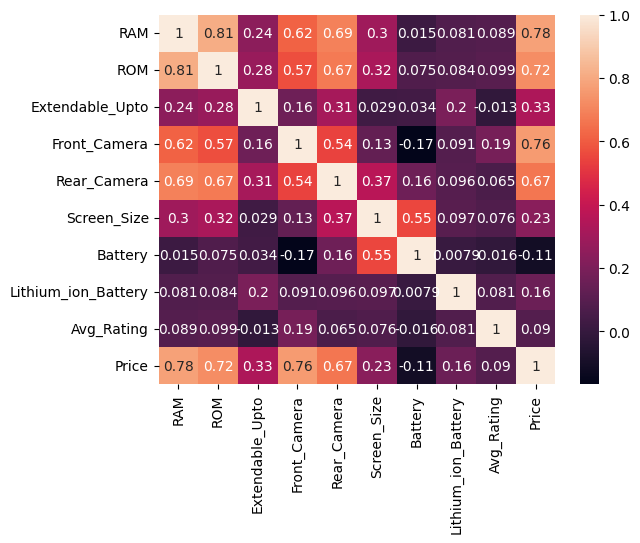

In [95]:
sns.heatmap(corr,annot=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9480\3178749660.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), rotation=45)


[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15')]

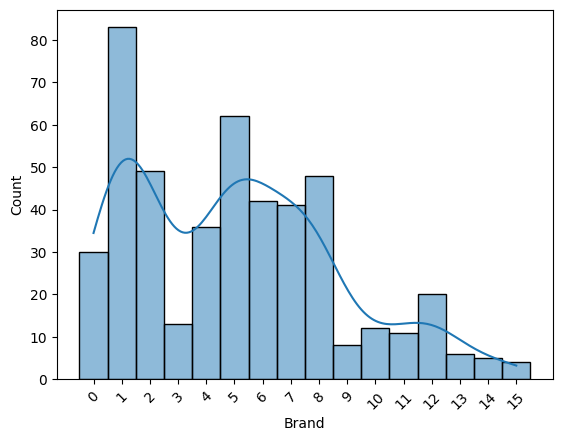

In [97]:
fig, ax = plt.subplots()
sns.histplot(df['Brand'],kde=2,bins=10,ax=ax)
ax.set_xticklabels(ax.get_xticks(), rotation=45)

In [98]:
X=df.drop("Price",axis=1)
y=df["Price"]

In [99]:
X.select_dtypes(include='number').columns

Index(['RAM', 'ROM', 'Extendable_Upto', 'Front_Camera', 'Rear_Camera',
       'Screen_Size', 'Battery', 'Lithium_ion_Battery', 'Avg_Rating'],
      dtype='object')

In [100]:
num_col = X.select_dtypes(include='number').columns.tolist()
cat_col = X.select_dtypes(exclude='number').columns.tolist()

In [101]:
num_col

['RAM',
 'ROM',
 'Extendable_Upto',
 'Front_Camera',
 'Rear_Camera',
 'Screen_Size',
 'Battery',
 'Lithium_ion_Battery',
 'Avg_Rating']

In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [103]:
X_train.shape

(376, 13)

In [104]:
X_test.shape

(94, 13)

In [105]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
transformer = ColumnTransformer(
    transformers=[
        ('numerical',StandardScaler(),num_col),
        ('ncategorical',OneHotEncoder(drop='first',handle_unknown='ignore'),cat_col)
    ]
)

In [106]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=200,
                            random_state=3,
                            max_samples=0.5,
                            max_features=0.75,
                            max_depth=15)

In [107]:
pipe=Pipeline(steps=[('transformer',transformer),('model',model)])
pipe.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  ['RAM', 'ROM',
                                                   'Extendable_Upto',
                                                   'Front_Camera',
                                                   'Rear_Camera', 'Screen_Size',
                                                   'Battery',
                                                   'Lithium_ion_Battery',
                                                   'Avg_Rating']),
                                                 ('ncategorical',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Brand', 'Processor',
                                                   'Colour', 'Display'])])),
                ('model',
                 RandomForestRegressor(max_depth=15, max_features=0.75,
                                       max_samples=0.5, n_estimators=200,
                                       random_state=3))])

In [108]:
preds=pipe.predict(X_test)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [109]:
from sklearn.metrics import r2_score,root_mean_squared_error
score=r2_score(preds,y_test)
rmse=root_mean_squared_error(preds,y_test)

In [110]:
print(score)
print(rmse)

0.9278416126614968
1791.9232083665959


In [111]:
test_df=pd.DataFrame(y_test)
test_df['predictions']=preds
test_df

,Price,predictions
34,16999,17914.670966
430,17990,19224.347119
220,12999,13393.648750
384,11999,10594.553083
74,23990,22798.300660
...,...,...
394,14999,14682.330000
412,14999,15468.526389
366,22999,21941.942596
223,8499,9608.266000


In [112]:
df.columns

Index(['Brand', 'RAM', 'ROM', 'Extendable_Upto', 'Processor', 'Front_Camera',
       'Rear_Camera', 'Screen_Size', 'Battery', 'Colour', 'Display',
       'Lithium_ion_Battery', 'Avg_Rating', 'Price'],
      dtype='object')

In [119]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [114]:
df.sample(5)

,Brand,RAM,ROM,Extendable_Upto,Processor,Front_Camera,Rear_Camera,Screen_Size,Battery,Colour,Display,Lithium_ion_Battery,Avg_Rating,Price
115,Mi,2,32,512,MediaTek Helio | G25,5,13,16.59,5000,Metallic Blue,HD,0,4.3,8499
83,realme,6,128,1024,MediaTek Dimensity | 700 (MT6833),16,48,16.51,5000,Racing Blue,Full HD,0,4.3,17999
265,realme,3,32,256,MediaTek Helio | G35,5,13,16.56,6000,Power Blue,HD,1,4.4,10999
341,vivo,6,128,1024,Qualcomm Snapdragon | 662,16,48,16.71,5000,Titanium Sapphire,Full HD,1,4.3,20990
131,Infinix,4,64,256,MediaTek Helio | G88,8,50,17.22,5000,Green Wave,Full HD,1,4.3,13999


In [115]:
ddf = df.drop("Price", axis=1)

In [116]:
ddf.sample(50).to_csv("test.csv",index=False)

In [118]:
query_dict = {
        "Brand": [Brand],
        "RAM": [RAM],
        "ROM": [ROM],
        "Extendable_Upto": [Extendable_Upto],
        "Processor": [Processor],
        "Front_Camera": [Front_Camera],
        "Rear_Camera": [Rear_Camera],
        "Screen_Size": [Screen_Size],
        "Battery": [Battery],
        "Colour": [Colour],
        "Display": [Display],
        "Lithium_ion_Battery": [Lithium_ion_Battery],
        "Avg_rating": [Avg_rating]
    }
query=pd.DataFrame(query_dict)
print(query)

  Brand  RAM  ROM  Extendable_Upto Processor  Front_Camera  Rear_Camera  \
0  Assd    4   23              244     sdasd            23          234   

   Screen_Size  Battery Colour Display  Lithium_ion_Battery  Avg_rating  
0         2123      231    sdf     dsd                    1         1.3  
